In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# 한글
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # window용
matplotlib.rcParams['font.size']= 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False

# df = pd.read_excel('score.xlsx',index_col='지원번호')
df=pd.read_csv('drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [204]:
a = df.groupby('continent')['total_servings'].sum()

In [205]:
a.index

Index(['AF', 'AS', 'EU', 'OC', 'SA'], dtype='object', name='continent')

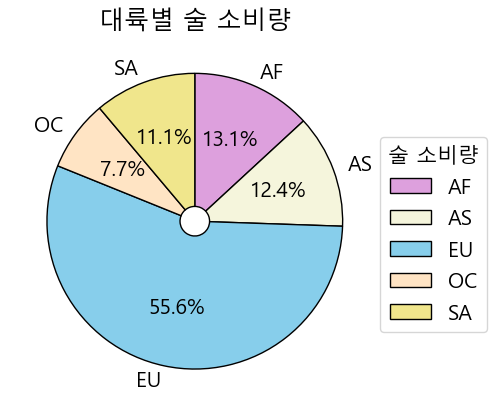

In [246]:
### total_servings 컬럼 추가
### 대륙별 total_servings 원 그래프로 출력
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']
a = df.groupby('continent')['total_servings'].sum()

wedgeprops={'width':0.9,'edgecolor':'black','linewidth':1}
labels=a.index
colors=['plum','beige','skyblue','bisque','khaki','peachpuff']

plt.title('대륙별 술 소비량')
plt.pie(a,labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops, colors=colors, startangle=90, counterclock=False)
plt.legend(loc=(1,0.2),title = '술 소비량')
plt.show()

In [248]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent', 'total_servings', 'mean'],
      dtype='object')

In [247]:
## 전체 평균보다 많은 알콜의 도수를 섭취하는 대륙을 출력
b = df['total_litres_of_pure_alcohol'].mean() # 전체 평균 도수
c = df.groupby('continent')['total_litres_of_pure_alcohol'].mean() # 대륙별 평균 도수

filt = b<c
filt

continent
AF    False
AS    False
EU     True
OC    False
SA     True
Name: total_litres_of_pure_alcohol, dtype: bool

In [249]:
# 1.대륙별 beer_servings를 높은 순으로 출력
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)


continent
EU    193.777778
SA    175.083333
OC     89.687500
AF     61.471698
AS     37.045455
Name: beer_servings, dtype: float64

In [250]:
# 2.제일 높은거 1개 출력
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1)

continent
EU    193.777778
Name: beer_servings, dtype: float64

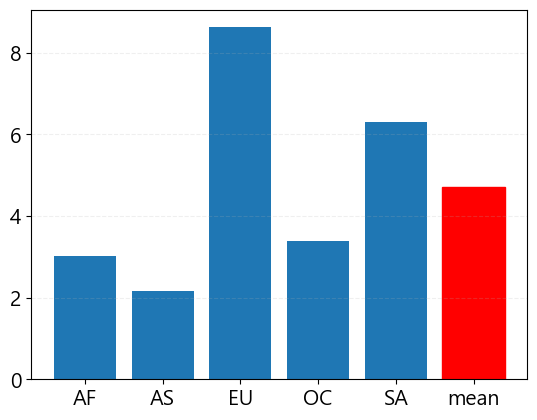

In [254]:
## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력하시오.
## 마지막에는 평균 막대그래프를 출력하시오.
# 1. 전체 total_litres_of_pure_alcohol 평균을 구하기
data = df['total_litres_of_pure_alcohol'].mean()

# 2. 대륙별 total_litres_of_pure_alcohol 평균을 구하기
# 'AF', 'AS', 'EU', 'OC', 'OT', 'SA'

con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con_df

# 3. 컬럼에 대륙별 평균을 추가하기 mean
con_df['mean'] = data

# 4. 막대그래프를 출력
con_bar = plt.bar(con_df.index,con_df)


plt.grid(axis='y',ls='--',alpha=0.2) #격자선
con_bar[len(con_df)-1].set_color('red')



